# Kendall Castilla
## 17 July 2022
### *This notebook will document the process of calling the Spotify API and using the retrieved data to gain insight on my listening habits.*

In [25]:
# Import necessary dependencies
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
print()

In [47]:
# Access token from https://developer.spotify.com/console/get-current-user-top-artists-and-tracks
access_token = 'BQDYCZD6xkugiKNxydemZF81vzurXphYdHfrlawkA7lO-jSjnAqyTkHy3mc6CAYWMobl9r6SkgKdRTgXad5pnuMk_b5D4BLsVAOVCC8eTqtf12CK3vcPEZ1yF_avUWyQh7nOEyTCycAuEGr5O5PqoU1XfhXI5UxOhZ56IvAdbSvyyup0OkgoUabFkBc6oAI41Yls8FLDHK3o9Q'

headers = {
    'Authorization': f'Bearer {access_token}'
}

# Base url for all Spotify API calls
BASE_URL = 'https://api.spotify.com/v1/'

In [48]:
r = requests.get(f'{BASE_URL}me/top/tracks',
                 headers=headers,
                 params={
                     'limit': 100,
                     'time_range': 'short_term',
                        })
r = r.json()

pprint(r)

{'href': 'https://api.spotify.com/v1/me/top/tracks?limit=50&offset=0&time_range=short_term',
 'items': [{'album': {'album_type': 'SINGLE',
                      'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1jVvXqdwDHekLwFBamrcUx'},
                                   'href': 'https://api.spotify.com/v1/artists/1jVvXqdwDHekLwFBamrcUx',
                                   'id': '1jVvXqdwDHekLwFBamrcUx',
                                   'name': 'Frankie Stew and Harvey Gunn',
                                   'type': 'artist',
                                   'uri': 'spotify:artist:1jVvXqdwDHekLwFBamrcUx'}],
                      'available_markets': ['AD',
                                            'AE',
                                            'AR',
                                            'AT',
                                            'AU',
                                            'BE',
                                            'BG',
    

                                 {'height': 300,
                                  'url': 'https://i.scdn.co/image/ab67616d00001e02d230f73c4dc2081b0dbef258',
                                  'width': 300},
                                 {'height': 64,
                                  'url': 'https://i.scdn.co/image/ab67616d00004851d230f73c4dc2081b0dbef258',
                                  'width': 64}],
                      'name': "I Feel Like I'm Blue",
                      'release_date': '2022-04-13',
                      'release_date_precision': 'day',
                      'total_tracks': 3,
                      'type': 'album',
                      'uri': 'spotify:album:0r6tkHiSV4jH8EgjbJFZzA'},
            'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6B03CBbFJ9aw9CjlxYP0UX'},
                         'href': 'https://api.spotify.com/v1/artists/6B03CBbFJ9aw9CjlxYP0UX',
                         'id': '6B03CBbFJ9aw9CjlxYP0UX',
            

                                            'MY',
                                            'NI',
                                            'NL',
                                            'NO',
                                            'NZ',
                                            'OM',
                                            'PA',
                                            'PE',
                                            'PH',
                                            'PL',
                                            'PS',
                                            'PT',
                                            'PY',
                                            'QA',
                                            'RO',
                                            'SA',
                                            'SE',
                                            'SG',
                                            'SK',
                                            'SV',


            'is_local': False,
            'name': 'Matinee',
            'popularity': 59,
            'preview_url': 'https://p.scdn.co/mp3-preview/de0ff5671aaef9732da749e501bc66d5018efbc1?cid=774b29d4f13844c495f206cafdad9c86',
            'track_number': 1,
            'type': 'track',
            'uri': 'spotify:track:5c5lCOFiMF14K2pzYep4wo'},
           {'album': {'album_type': 'COMPILATION',
                      'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3jc496ljiyrS3ECrD7QiqL'},
                                   'href': 'https://api.spotify.com/v1/artists/3jc496ljiyrS3ECrD7QiqL',
                                   'id': '3jc496ljiyrS3ECrD7QiqL',
                                   'name': 'Gipsy Kings',
                                   'type': 'artist',
                                   'uri': 'spotify:artist:3jc496ljiyrS3ECrD7QiqL'}],
                      'available_markets': ['US'],
                      'external_urls': {'spotify': 'https:

                                   'name': 'Smino',
                                   'type': 'artist',
                                   'uri': 'spotify:artist:1ybINI1qPiFbwDXamRtwxD'}],
                      'available_markets': ['AD',
                                            'AE',
                                            'AR',
                                            'AT',
                                            'AU',
                                            'BE',
                                            'BG',
                                            'BH',
                                            'BO',
                                            'BR',
                                            'CA',
                                            'CH',
                                            'CL',
                                            'CO',
                                            'CR',
                                            'CY',
          

In [49]:
tracks = {'id':[], 'track_title':[], 'artist':[], 'album':[], 'r_date':[]}
tracks_id = []
pos = 1
for item in r['items']:
    track_title = item['name']
    track_id = item['id']
    tracks_id.append(track_id)
    artists = []
    for i in range(0, len(item['artists'])):
        artists.append(item['artists'][i]['name'])
    artist = "/".join(artists)
    album = item['album']['name']
    r_date = item['album']['release_date']
    print(f'{pos})\n\tTrack: "{track_title}", \n\tID: "{track_id}"\n\tArtist(s): {artist}\n\tAlbum: "{album}"\
        \n\tRelease Date: {r_date}\n')
    print('--------------------------------------------------------------------------------------\n')
    tracks['id'].append(track_id)
    tracks['track_title'].append(track_title)
    tracks['artist'].append(artist)
    tracks['album'].append(album)
    tracks['r_date'].append(r_date)
    pos+=1


1)
	Track: "Cats and Dogs", 
	ID: "68KODWWsTY1QEAeqIYkrDO"
	Artist(s): Frankie Stew and Harvey Gunn/Kojey Radical
	Album: "Cats and Dogs"        
	Release Date: 2022-10-25

--------------------------------------------------------------------------------------

2)
	Track: "A La Luna", 
	ID: "7CmwT0Z2PLP8MqxFLXGtnL"
	Artist(s): Flor Sz/JA Beatz
	Album: "A La Luna"        
	Release Date: 2022-09-16

--------------------------------------------------------------------------------------

3)
	Track: "Straight Talker", 
	ID: "6Gq99VdfbBlsw9qlAZp6x4"
	Artist(s): ELIZA
	Album: "A Sky Without Stars"        
	Release Date: 2022-09-16

--------------------------------------------------------------------------------------

4)
	Track: "Astrology Joint", 
	ID: "1jcGbrSCZ32Q2vyvOpOZzg"
	Artist(s): Col3trane
	Album: "Astrology Joint"        
	Release Date: 2022-10-28

--------------------------------------------------------------------------------------

5)
	Track: "With Or Without", 
	ID: "3JtCBqE5mi6

In [50]:
df_tracks = pd.DataFrame(tracks)
df_tracks

,id,track_title,artist,album,r_date
0,68KODWWsTY1QEAeqIYkrDO,Cats and Dogs,Frankie Stew and Harvey Gunn/Kojey Radical,Cats and Dogs,2022-10-25
1,7CmwT0Z2PLP8MqxFLXGtnL,A La Luna,Flor Sz/JA Beatz,A La Luna,2022-09-16
2,6Gq99VdfbBlsw9qlAZp6x4,Straight Talker,ELIZA,A Sky Without Stars,2022-09-16
3,1jcGbrSCZ32Q2vyvOpOZzg,Astrology Joint,Col3trane,Astrology Joint,2022-10-28
4,3JtCBqE5mi63kwijORTtLZ,With Or Without,Léa Sen,"You Of Now, Pt. 1",2022-05-20
5,6velCkqiRacqwh6EwDBIov,Gold,Frankie Stew and Harvey Gunn,Nothing New Under The Sun,2022-10-28
6,1dOLqDmcDJ0qgH6WO3Xdh0,Habla Me,Gipsy Kings,!Volare! The Very Best of the Gipsy Kings,2000-09-05
7,1Zne9LU0cL7TLKGVrmpsED,PATH,SanD,Sendero al Sandismo,2022-08-12
8,7v6B1kRUvNbkVGfqSkrwuS,Tomorrow,GloRilla/CMG The Label,Tomorrow,2022-07-20
9,1Kmkp970rVmzoQLJfOvkYo,scars,Baby Keem,The Melodic Blue (Deluxe),2022-10-28


In [51]:
ids = ','.join(tracks_id)
#s_tracks
ids

'68KODWWsTY1QEAeqIYkrDO,7CmwT0Z2PLP8MqxFLXGtnL,6Gq99VdfbBlsw9qlAZp6x4,1jcGbrSCZ32Q2vyvOpOZzg,3JtCBqE5mi63kwijORTtLZ,6velCkqiRacqwh6EwDBIov,1dOLqDmcDJ0qgH6WO3Xdh0,1Zne9LU0cL7TLKGVrmpsED,7v6B1kRUvNbkVGfqSkrwuS,1Kmkp970rVmzoQLJfOvkYo,1MhOL0aasIceTmurickKxx,7k1c4N0lvcP5RtDBKTHoTW,06UCuKAVeQRiNcHAb9Vug7,3NCGvnHRoedGXaqR42fxmc,7MM5BgxR7xdE6Pt0XsnI82,0b9IHCwEySjLJ2iHQymum6,5DIW3RIKvaZRoFdWgHhrEW,2vVP0dYc6rjkXalTfPthfa,60MeVTJWFnhIqASMhkWp9N,23pWvuKGYQUOGv45L0sPXf,6F3iddkEZ25Tm6eF00Uoha,35ovElsgyAtQwYPYnZJECg,3CF5Jehu93omBGJyWRcE70,12CNybio0Bxean3F3uYugU,29x8z6fxeHdVTc0P3rhv10,2GYr6qrqytM644nq3smcgw,3Gjx7TOIYZkO9X8HoikLgy,3X7aFBB2ja4QT2XEuxKCIA,0E1GJFHAHBQLNyh7VZqDoZ,10mQ8GRpBfQuySHPvJoWHL,5c5lCOFiMF14K2pzYep4wo,5oVs4alUctAl0B0QhWY0I2,1t1k0q2YXX5dD0aVUrV2SW,4XJPAIcSCBc0ltPAW3K4sB,5bbgrpn8N8oMVy6aP9XLDj,2qApuf4yp1c6sTMj9BJ8bo,5MsO7aTFKXvUy8ziyLZYOX,6ja11GoXgF75QkEVqqAadn,4e8Eqj6ynTG5HjewvBaVH3,5gy0Q5z9spNyQS2D38HOk0,02cgOcXNV1geVn6Paplsob,32hX5SqIlHokFUW20sxhs4,3K9IrLs25jHtvWjAAFAfav,48FaBfZfSV

In [52]:
r2 = requests.get(f"{BASE_URL}audio-features",
                  headers=headers,
                 params={
                     'ids':ids,
                        })
r2 = r2.json()
#pprint(r2)
# Retrieve tracks from album info, and print them out
pos = 0
feats = {}
"""for track in r2['audio_features']:
    feats[pos] = []
    for feat in track:
        feats[pos].append()
    pos+=1"""
    
df_feats = pd.DataFrame(r2['audio_features'])
df_feats.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.831,0.751,2,-8.920,1,0.2170,0.2070,0.000000,0.1050,0.116,120.046,audio_features,68KODWWsTY1QEAeqIYkrDO,spotify:track:68KODWWsTY1QEAeqIYkrDO,https://api.spotify.com/v1/tracks/68KODWWsTY1Q...,https://api.spotify.com/v1/audio-analysis/68KO...,202714,4
1,0.680,0.471,9,-9.713,0,0.0487,0.4990,0.000051,0.1020,0.358,90.031,audio_features,7CmwT0Z2PLP8MqxFLXGtnL,spotify:track:7CmwT0Z2PLP8MqxFLXGtnL,https://api.spotify.com/v1/tracks/7CmwT0Z2PLP8...,https://api.spotify.com/v1/audio-analysis/7Cmw...,248000,4
2,0.684,0.282,2,-12.055,1,0.1320,0.0593,0.891000,0.0832,0.709,174.112,audio_features,6Gq99VdfbBlsw9qlAZp6x4,spotify:track:6Gq99VdfbBlsw9qlAZp6x4,https://api.spotify.com/v1/tracks/6Gq99VdfbBls...,https://api.spotify.com/v1/audio-analysis/6Gq9...,201734,4
3,0.658,0.429,2,-10.276,0,0.1370,0.7390,0.003590,0.0977,0.637,73.207,audio_features,1jcGbrSCZ32Q2vyvOpOZzg,spotify:track:1jcGbrSCZ32Q2vyvOpOZzg,https://api.spotify.com/v1/tracks/1jcGbrSCZ32Q...,https://api.spotify.com/v1/audio-analysis/1jcG...,152233,4
4,0.804,0.470,7,-10.248,1,0.0588,0.4770,0.541000,0.1570,0.735,114.985,audio_features,3JtCBqE5mi63kwijORTtLZ,spotify:track:3JtCBqE5mi63kwijORTtLZ,https://api.spotify.com/v1/tracks/3JtCBqE5mi63...,https://api.spotify.com/v1/audio-analysis/3JtC...,186227,4


In [53]:
df = pd.concat([df_tracks, df_feats], axis=1)
df.drop(['id', 'type', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)
df

,track_title,artist,album,r_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Cats and Dogs,Frankie Stew and Harvey Gunn/Kojey Radical,Cats and Dogs,2022-10-25,0.831,0.7510,2,-8.920,1,0.2170,0.20700,0.000000,0.1050,0.1160,120.046,202714,4
1,A La Luna,Flor Sz/JA Beatz,A La Luna,2022-09-16,0.680,0.4710,9,-9.713,0,0.0487,0.49900,0.000051,0.1020,0.3580,90.031,248000,4
2,Straight Talker,ELIZA,A Sky Without Stars,2022-09-16,0.684,0.2820,2,-12.055,1,0.1320,0.05930,0.891000,0.0832,0.7090,174.112,201734,4
3,Astrology Joint,Col3trane,Astrology Joint,2022-10-28,0.658,0.4290,2,-10.276,0,0.1370,0.73900,0.003590,0.0977,0.6370,73.207,152233,4
4,With Or Without,Léa Sen,"You Of Now, Pt. 1",2022-05-20,0.804,0.4700,7,-10.248,1,0.0588,0.47700,0.541000,0.1570,0.7350,114.985,186227,4
5,Gold,Frankie Stew and Harvey Gunn,Nothing New Under The Sun,2022-10-28,0.699,0.2020,3,-16.328,1,0.0481,0.88500,0.812000,0.1170,0.4860,119.961,88000,4
6,Habla Me,Gipsy Kings,!Volare! The Very Best of the Gipsy Kings,2000-09-05,0.588,0.5150,6,-10.839,1,0.0328,0.80000,0.000036,0.2800,0.5970,83.917,244640,4
7,PATH,SanD,Sendero al Sandismo,2022-08-12,0.711,0.4970,4,-8.951,1,0.0984,0.73900,0.000002,0.0816,0.4730,120.000,175000,4
8,Tomorrow,GloRilla/CMG The Label,Tomorrow,2022-07-20,0.638,0.7360,0,-5.130,1,0.5370,0.06550,0.000000,0.0883,0.7850,159.852,113845,4
9,scars,Baby Keem,The Melodic Blue (Deluxe),2022-10-28,0.750,0.6960,10,-6.685,0,0.0425,0.24600,0.000047,0.1220,0.3860,124.005,266011,4


In [54]:
from datetime import datetime

df.r_date = df.r_date.apply(lambda x: x[:7])
df


,track_title,artist,album,r_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Cats and Dogs,Frankie Stew and Harvey Gunn/Kojey Radical,Cats and Dogs,2022-10,0.831,0.7510,2,-8.920,1,0.2170,0.20700,0.000000,0.1050,0.1160,120.046,202714,4
1,A La Luna,Flor Sz/JA Beatz,A La Luna,2022-09,0.680,0.4710,9,-9.713,0,0.0487,0.49900,0.000051,0.1020,0.3580,90.031,248000,4
2,Straight Talker,ELIZA,A Sky Without Stars,2022-09,0.684,0.2820,2,-12.055,1,0.1320,0.05930,0.891000,0.0832,0.7090,174.112,201734,4
3,Astrology Joint,Col3trane,Astrology Joint,2022-10,0.658,0.4290,2,-10.276,0,0.1370,0.73900,0.003590,0.0977,0.6370,73.207,152233,4
4,With Or Without,Léa Sen,"You Of Now, Pt. 1",2022-05,0.804,0.4700,7,-10.248,1,0.0588,0.47700,0.541000,0.1570,0.7350,114.985,186227,4
5,Gold,Frankie Stew and Harvey Gunn,Nothing New Under The Sun,2022-10,0.699,0.2020,3,-16.328,1,0.0481,0.88500,0.812000,0.1170,0.4860,119.961,88000,4
6,Habla Me,Gipsy Kings,!Volare! The Very Best of the Gipsy Kings,2000-09,0.588,0.5150,6,-10.839,1,0.0328,0.80000,0.000036,0.2800,0.5970,83.917,244640,4
7,PATH,SanD,Sendero al Sandismo,2022-08,0.711,0.4970,4,-8.951,1,0.0984,0.73900,0.000002,0.0816,0.4730,120.000,175000,4
8,Tomorrow,GloRilla/CMG The Label,Tomorrow,2022-07,0.638,0.7360,0,-5.130,1,0.5370,0.06550,0.000000,0.0883,0.7850,159.852,113845,4
9,scars,Baby Keem,The Melodic Blue (Deluxe),2022-10,0.750,0.6960,10,-6.685,0,0.0425,0.24600,0.000047,0.1220,0.3860,124.005,266011,4


## Machine Learning w/ sklearn

In [55]:
from sklearn.preprocessing import StandardScaler

In [66]:
df_1 = df[['track_title', 'energy', 'tempo']].sort_values('energy', axis=0)
df_1

,track_title,energy,tempo
25,Last Movement Of Hope,0.0495,134.416
20,On the Cusp,0.0913,85.499
11,In a Minute,0.1430,99.003
18,Look at What the Light Did Now - Re-Issue,0.1480,79.670
26,Dripping,0.1570,93.506
41,Goodbye Letters,0.1640,105.912
13,ME vs ME,0.1920,92.085
5,Gold,0.2020,119.961
24,Heat of the Moon,0.2030,126.018
29,Everywhere I'll Ever Be,0.2510,127.009


<AxesSubplot:xlabel='energy', ylabel='tempo'>

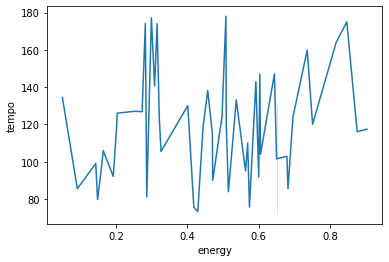

In [69]:
sns.lineplot(data = df_1,
               x = 'energy',
               y = 'tempo')

In [86]:
keymap = {0:'C', 1:'C#', 2:'D', 3:'D#/Eb', 4:'E', 5:'F', 6:'F#/Gb', 
          7:'G', 8:'G#/Ab', 9:'A', 10:'A#/Bb', 11:'B', 12:'C'}
modemap = {0:'minor', 1:'Major'}
df['key-mode'] = df['key'].apply(lambda x: keymap[x]) + '-' + df['mode'].apply(lambda x: modemap[x])
keymode = ['key', 'mode', 'key-mode']
df[keymode]

,key,mode,key-mode
0,2,1,D-Major
1,9,0,A-minor
2,2,1,D-Major
3,2,0,D-minor
4,7,1,G-Major
5,3,1,D#/Eb-Major
6,6,1,F#/Gb-Major
7,4,1,E-Major
8,0,1,C-Major
9,10,0,A#/Bb-minor


In [94]:
df_2 = df.groupby(by=['artist'])
df_2